# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing db and data dictionary

In [5]:
#Import the data set you exported in #1#Exercise 4.9.
df = pd.read_pickle(r'/Users/nayeraibrahim/Documents/CF assignments/Python/27-10-2020 Instacart Basket Analysis/02 Data/Prepared Data/customer_merged.pkl')


In [6]:
#importing departments dataframe
departments= pd.read_csv(r'/Users/nayeraibrahim/Documents/CF assignments/Python/27-10-2020 Instacart Basket Analysis/02 Data/Prepared Data/departments_wrangled.csv')

In [7]:
#dropping unnecessary columns from the departments dataframe and converting it to a data dictionary
department_new= departments[1:]
Departments=department_new.drop(columns = ['Unnamed: 0'])
Departments

,department
1,other
2,bakery
3,produce
4,alcohol
5,international
6,beverages
7,pets
8,dry goods pasta
9,bulk
10,personal care


In [8]:
data_dict = departments.department.to_dict()
data_dict

{0: 'frozen',
 1: 'other',
 2: 'bakery',
 3: 'produce',
 4: 'alcohol',
 5: 'international',
 6: 'beverages',
 7: 'pets',
 8: 'dry goods pasta',
 9: 'bulk',
 10: 'personal care',
 11: 'meat seafood',
 12: 'pantry',
 13: 'breakfast',
 14: 'canned goods',
 15: 'dairy eggs',
 16: 'household',
 17: 'babies',
 18: 'snacks',
 19: 'deli',
 20: 'missing'}

In [101]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,First Name,Surnam,Gender,State,Age,date_joined,Number_of_dependants,Familial_status,income,True
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,196,1.0,0.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0,196,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
2,473747.0,1.0,prior,3.0,3.0,12.0,21.0,196,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0,196,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
4,431534.0,1.0,prior,5.0,4.0,15.0,28.0,196,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both


# Dropping PII data

In [10]:
#2# Columns 'First name' and 'Surname' are considered PII data and will be dropped from the data set
df_PII=df.drop(columns=['First Name','Surnam'])

# Importing US regions and states

In [11]:
#3# A .csv file was created with US regions and states. This file will be imported and merged with df_PII dataframe
df_regions_states = pd.read_csv(r'/Users/nayeraibrahim/Documents/CF assignments/Python/27-10-2020 Instacart Basket Analysis/02 Data/Original Data/Regions_states.csv')
df_regions = df_PII.merge(df_regions_states, on = 'State')


In [11]:
df_regions.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'Unnamed: 0',
       'product_name', 'aisle_id', 'department_id', 'prices', '_merge2',
       'max_order', 'loyalty_flag', 'avg_price', 'spender_flag', 'cust_reg',
       'frequent_flag', 'Gender', 'State', 'Age', 'date_joined',
       'Number_of_dependants', 'Familial_status', 'income', 'True', 'Region'],
      dtype='object')

In [12]:
df_regions.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequent_flag,Gender,State,Age,date_joined,Number_of_dependants,Familial_status,income,True,Region
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,196,1.0,0.0,...,non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South)
1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0,196,1.0,1.0,...,non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South)
2,473747.0,1.0,prior,3.0,3.0,12.0,21.0,196,1.0,1.0,...,non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South)
3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0,196,1.0,1.0,...,non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South)
4,431534.0,1.0,prior,5.0,4.0,15.0,28.0,196,1.0,1.0,...,non-frequent customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South)


# Checking relationship between spending habits and US region

In [13]:
#3#This check will be carried out using crosstab vetween the two columns
crosstab = pd.crosstab(df_regions['Region'], df_regions['spender_flag'], dropna = False)
crosstab.to_clipboard()


In [14]:
#3#The result shows that the Southern regions has the greatest amount of spenders (low spenders). 

# Excluding low activity customers

In [15]:
#4#First, a table with order number counts will be created
order_count=df_regions.groupby('user_id').agg({'order_number': 'count'})
order_count

,order_number
user_id,
1.0,59
2.0,195
3.0,88
4.0,18
5.0,37
...,...
206205.0,32
206206.0,285
206207.0,223


In [16]:
#4#Changing column name to order_count
order_count.rename(columns = {'order_number' : 'order_count'}, inplace = True)
order_count

,order_count
user_id,
1.0,59
2.0,195
3.0,88
4.0,18
5.0,37
...,...
206205.0,32
206206.0,285
206207.0,223


In [17]:
#4# converting user_id from index to column
order_count = order_count.reset_index()


In [18]:
#4#Then, order_count will be merged with df_regions on user_id, to get a column with the number of orders per user.
df_ord_count = df_regions.merge(order_count, on = 'user_id')
df_ord_count.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Gender,State,Age,date_joined,Number_of_dependants,Familial_status,income,True,Region,order_count
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,196,1.0,0.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South),59
1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0,196,1.0,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South),59
2,473747.0,1.0,prior,3.0,3.0,12.0,21.0,196,1.0,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South),59
3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0,196,1.0,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South),59
4,431534.0,1.0,prior,5.0,4.0,15.0,28.0,196,1.0,1.0,...,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South),59


In [46]:
#4#creating a column to flag users ordering less than five items
df_ord_count.loc[df_ord_count['order_count'] < 5, 'consumer potential'] = 'weak consumer'
df_ord_count.loc[df_ord_count['order_count'] > 5, 'consumer potential'] = 'strong consumer'
df_ord_count.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Age,date_joined,Number_of_dependants,Familial_status,income,True,Region,price_range_loc,order_count,consumer potential
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,196,1.0,0.0,...,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South),NaN,59,strong consumer
1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0,196,1.0,1.0,...,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South),NaN,59,strong consumer
2,473747.0,1.0,prior,3.0,3.0,12.0,21.0,196,1.0,1.0,...,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South),NaN,59,strong consumer
3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0,196,1.0,1.0,...,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South),NaN,59,strong consumer
4,431534.0,1.0,prior,5.0,4.0,15.0,28.0,196,1.0,1.0,...,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South),NaN,59,strong consumer


In [47]:
#4#creating a dataframe including only strong consumers
df_strong_consumers =  df_ord_count[df_ord_count['consumer potential']=='strong consumer']
df_strong_consumers.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Age,date_joined,Number_of_dependants,Familial_status,income,True,Region,price_range_loc,order_count,consumer potential
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,196,1.0,0.0,...,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South),NaN,59,strong consumer
1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0,196,1.0,1.0,...,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South),NaN,59,strong consumer
2,473747.0,1.0,prior,3.0,3.0,12.0,21.0,196,1.0,1.0,...,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South),NaN,59,strong consumer
3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0,196,1.0,1.0,...,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South),NaN,59,strong consumer
4,431534.0,1.0,prior,5.0,4.0,15.0,28.0,196,1.0,1.0,...,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South),NaN,59,strong consumer


In [50]:
#4#exporting the dataframe
df_strong_consumers.to_pickle(r'/Users/nayeraibrahim/Documents/CF assignments/Python/27-10-2020 Instacart Basket Analysis/02 Data/Prepared Data/strong_consumers.pkl')

# Creating consumer profiles

In [54]:
#5#creating consumer profiles

In [30]:
#5#Age profile
df_ord_count.loc[df_ord_count['Age'] < 18, 'Age_flag'] = 'Young person'
df_ord_count.loc[(df_ord_count['Age'] >= 18) & (df_ord_count['Age'] < 65), 'Age_flag'] = 'Adult'
df_ord_count.loc[df_ord_count['Age'] > 65, 'Age_flag'] = 'Senior citizen'


In [46]:
#5#income profile
df_ord_count.loc[df_ord_count['income'] < 99435.38, 'Income_flag'] = 'Below avg. income'
df_ord_count.loc[df_ord_count['income'] > 99435.38, 'Income_flag'] = 'Above avg. income'


In [47]:
#5#familial status profile
df_ord_count.loc[df_ord_count['Number_of_dependants'] == 0, 'Family_flag'] = 'No family'
df_ord_count.loc[df_ord_count['Number_of_dependants'] == 1, 'Family_flag'] = 'Small family'
df_ord_count.loc[df_ord_count['Number_of_dependants'] > 1, 'Family_flag'] = 'Big family'



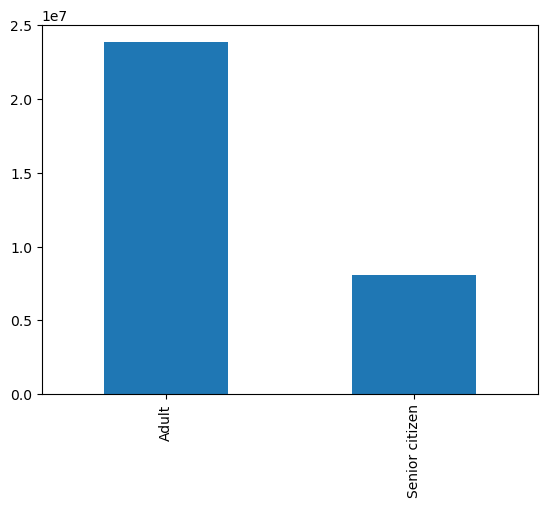

In [67]:
#6a#plotting age profile
age_plot=df_ord_count['Age_flag'].value_counts().sort_index().plot.bar()


In [63]:
df_ord_count['Age'].describe()

count    3.243624e+07
mean     4.946510e+01
std      1.848553e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

### Senior citizens form the minority of consumers

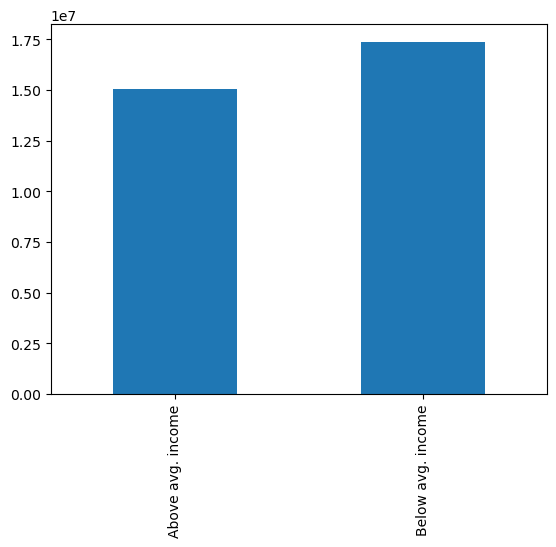

In [66]:
#6b#plotting income profile
income_plot=df_ord_count['Income_flag'].value_counts().sort_index().plot.bar()


### The number of consumers whose income is below average is greater than the number of consumers whose income is above average

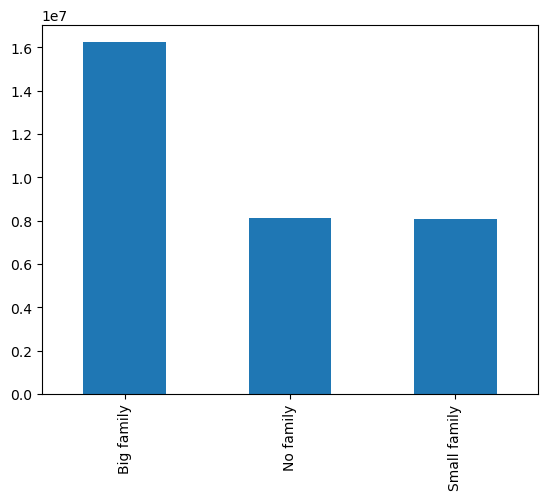

In [65]:
#6c#plotting familial status profile
family_plot=df_ord_count['Family_flag'].value_counts().sort_index().plot.bar()


### Most of the consumers have two or more children

In [ ]:
#7#Aggregate the max, mean, and min variables on a customer-profile level for usage frequency(order_count)
#and expenditure(avg_price) 

In [68]:
#7a#Age
df_ord_count.groupby('Age_flag').agg({'order_count': ['mean', 'min', 'max']})


order_count          
                      mean min   max
Age_flag                            
Adult           423.841083   3  3638
Senior citizen  418.677962   3  3725

In [69]:
#7a#Age
df_ord_count.groupby('Age_flag').agg({'avg_price': ['mean', 'min', 'max']})


avg_price                   
                     mean  min           max
Age_flag                                    
Adult           12.054181  1.0  25005.425000
Senior citizen  11.837189  1.0  14042.512281

In [71]:
#7b#Income
df_ord_count.groupby('Income_flag').agg({'order_count': ['mean', 'min', 'max']})


order_count          
                         mean min   max
Income_flag                            
Above avg. income  430.909482   3  3725
Below avg. income  415.071259   3  3638

In [72]:
#7b#Income
df_ord_count.groupby('Income_flag').agg({'avg_price': ['mean', 'min', 'max']})


avg_price                   
                        mean  min           max
Income_flag                                    
Above avg. income  16.446805  7.0  25005.425000
Below avg. income   8.102686  1.0   7700.025641

In [73]:
#7c#Familial status
df_ord_count.groupby('Family_flag').agg({'avg_price': ['mean', 'min', 'max']})


avg_price                
                   mean  min        max
Family_flag                            
Big family    12.078295  1.0  11772.100
No family     12.127364  1.0  25005.425
Small family  11.628203  1.1  12506.925

In [74]:
#7c#Familial status
df_ord_count.groupby('Family_flag').agg({'order_count': ['mean', 'min', 'max']})


order_count          
                    mean min   max
Family_flag                       
Big family    420.945165   3  3725
No family     423.661224   3  3638
Small family  424.168471   3  2907

# Comparing consumer profiles with regions and departments


In [38]:
#8#Compare consumer profiles with regions and departments
#8a-i crosstabing age profile with region
crosstab_age_region=pd.crosstab(df_ord_count['Age_flag'], df_ord_count['Region'])
crosstab_age_region

Region,Region 1 (Northeast),Region 2 (Midwest),Region 3 (South),Region 4 (West)
Age_flag,,,,
Adult,4173163,5611827,7963486,6104679
Senior citizen,1460453,1883174,2671876,2080128


Text(0, 0.5, 'Count')

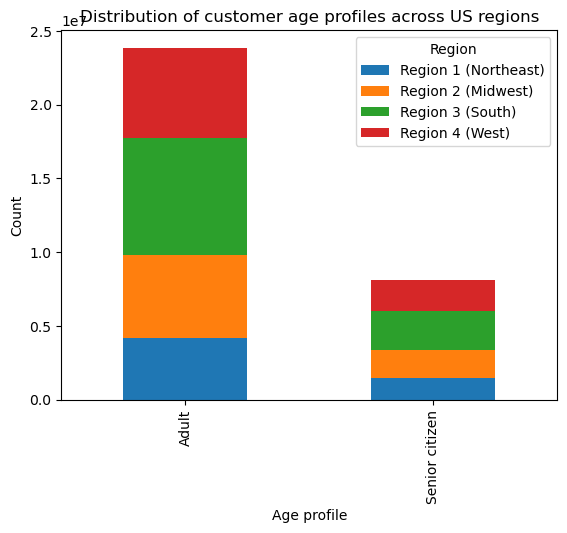

In [42]:
bar_crosstab_age_region = crosstab_age_region.plot(kind= 'bar', stacked = True)
plt.title("Distribution of customer age profiles across US regions")
plt.xlabel("Age profile")
plt.ylabel("Count (10^7)")

In [155]:
#Adults from the southern and western US regions form the majority of consumers.

In [20]:
#changing the data type of the department_id column to ensure successful mapping to data dictionary
df_ord_count['department_id'] = df_ord_count['department_id'].astype(float).fillna(-1).astype(int)


In [21]:
# Connect department names to department_id dataframe in order to create the crosstab between the departments and consumer profiles
df_ord_count['department'] = df_ord_count['department_id'].map(data_dict)
df_ord_count.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,State,Age,date_joined,Number_of_dependants,Familial_status,income,True,Region,order_count,department
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,196,1.0,0.0,...,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South),59,pets
1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0,196,1.0,1.0,...,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South),59,pets
2,473747.0,1.0,prior,3.0,3.0,12.0,21.0,196,1.0,1.0,...,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South),59,pets
3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0,196,1.0,1.0,...,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South),59,pets
4,431534.0,1.0,prior,5.0,4.0,15.0,28.0,196,1.0,1.0,...,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,Region 3 (South),59,pets


In [31]:
#8a-ii crosstabing age profile with department
crosstab_age_department=pd.crosstab(df_ord_count['department'] , df_ord_count['Age_flag'])
crosstab_age_department

Age_flag,Adult,Senior citizen
department,,
alcohol,6965528,2368314
babies,541731,186038
bakery,26866,8798
beverages,198479,66615
breakfast,1378390,468416
bulk,637692,216412
canned goods,520032,173783
dairy eggs,785620,266021
deli,2127035,718640


Text(0, 0.5, 'Count (10^6)')

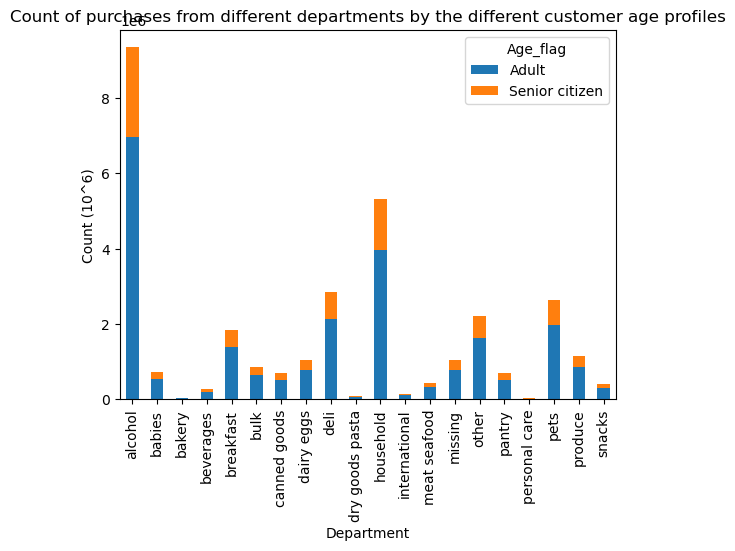

In [43]:
bar_crosstab_age_department = crosstab_age_department.plot(kind= 'bar', stacked = True)
plt.title("Count of purchases from different departments by the different customer age profiles")
plt.xlabel("Department")
plt.ylabel("Count (10^6)")

In [ ]:
#Alcohol and household products are the most popular items bought by adults and senior citizens.

In [48]:
#8b-i crosstabing income profile with region
crosstab_income_region=pd.crosstab(df_ord_count['Income_flag'], df_ord_count['Region'])
crosstab_income_region

Region,Region 1 (Northeast),Region 2 (Midwest),Region 3 (South),Region 4 (West)
Income_flag,,,,
Above avg. income,2671720,3597205,4945208,3851671
Below avg. income,3056927,4007071,5857189,4449250


Text(0, 0.5, 'Count (10^7)')

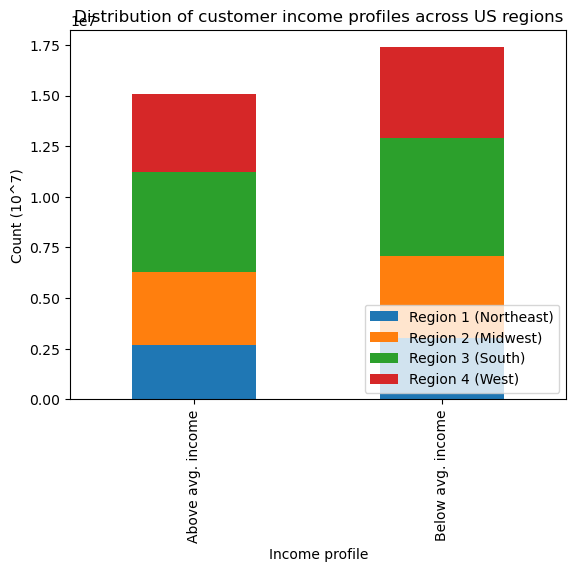

In [51]:
bar_crosstab_income_region = crosstab_income_region.plot(kind= 'bar', stacked = True).legend(loc='lower right')
plt.title("Distribution of customer income profiles across US regions")
plt.xlabel("Income profile")
plt.ylabel("Count (10^7)")

In [ ]:
#Consumers from the Northeastern states form the minority of consumers

In [52]:
#8b-ii crosstabing income profile with department
crosstab_income_department=pd.crosstab(df_ord_count['department'],df_ord_count['Income_flag'])
crosstab_income_department

Income_flag,Above avg. income,Below avg. income
department,,
alcohol,4483213,4996078
babies,340547,398119
bakery,16875,19416
beverages,127931,141322
breakfast,894367,981002
bulk,418840,447787
canned goods,315936,388175
dairy eggs,517469,550589
deli,1165363,1722187


Text(0, 0.5, 'Count (10^6)')

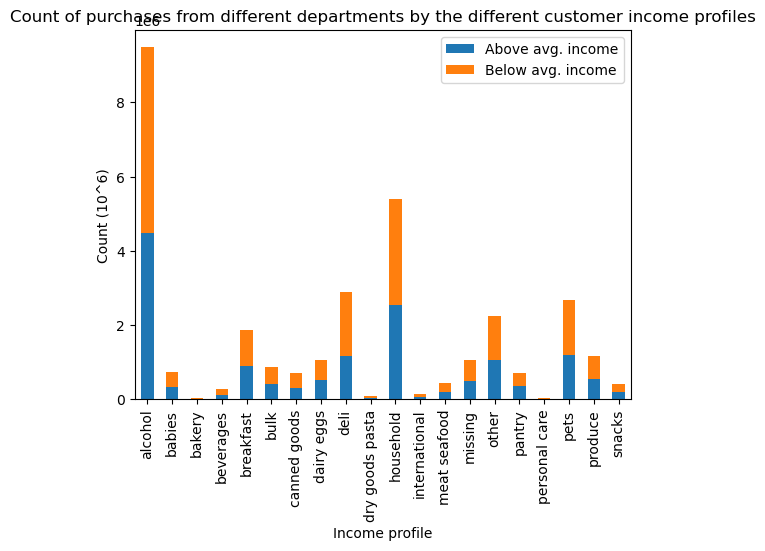

In [55]:
bar_crosstab_income_department = crosstab_income_department.plot(kind= 'bar', stacked = True).legend(loc='upper right')
plt.title("Count of purchases from different departments by the different customer income profiles")
plt.xlabel("Income profile")
plt.ylabel("Count (10^6)")

In [ ]:
#Alcohol and household produce are most popular purchases by above and below average income consumers

In [57]:
#8c-i crosstabing family profile with region
crosstab_family_region=pd.crosstab(df_ord_count['Family_flag'], df_ord_count['Region'])
crosstab_family_region

Region,Region 1 (Northeast),Region 2 (Midwest),Region 3 (South),Region 4 (West)
Family_flag,,,,
Big family,2865099,3769147,5435666,4171858
No family,1419788,1907059,2704408,2074446
Small family,1443760,1928070,2662323,2054617


Text(0, 0.5, 'Count (10^7)')

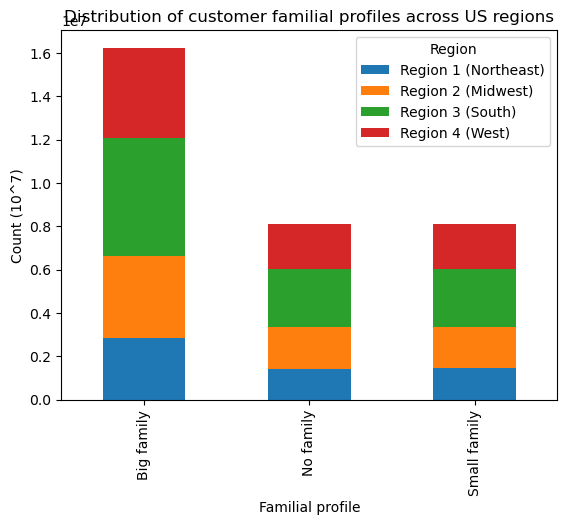

In [58]:
bar_crosstab_family_region = crosstab_family_region.plot(kind= 'bar', stacked = True)
plt.title("Distribution of customer familial profiles across US regions")
plt.xlabel("Familial profile")
plt.ylabel("Count (10^7)")

In [ ]:
#big families from the western and southern region of the US form a big portion of the consumers

In [35]:
#8c-ii crosstabing income profile with department
crosstab_family_department=pd.crosstab(df_ord_count['department'], df_ord_count['Family_flag'])
crosstab_family_department

Family_flag,Big family,No family,Small family
department,,,
alcohol,4744660,2375445,2359186
babies,372549,180773,185344
bakery,17930,9175,9186
beverages,133532,67713,68008
breakfast,939262,466757,469350
bulk,435305,215262,216060
canned goods,351733,174886,177492
dairy eggs,536091,264838,267129
deli,1447814,720798,718938


Text(0, 0.5, 'Count (10^6)')

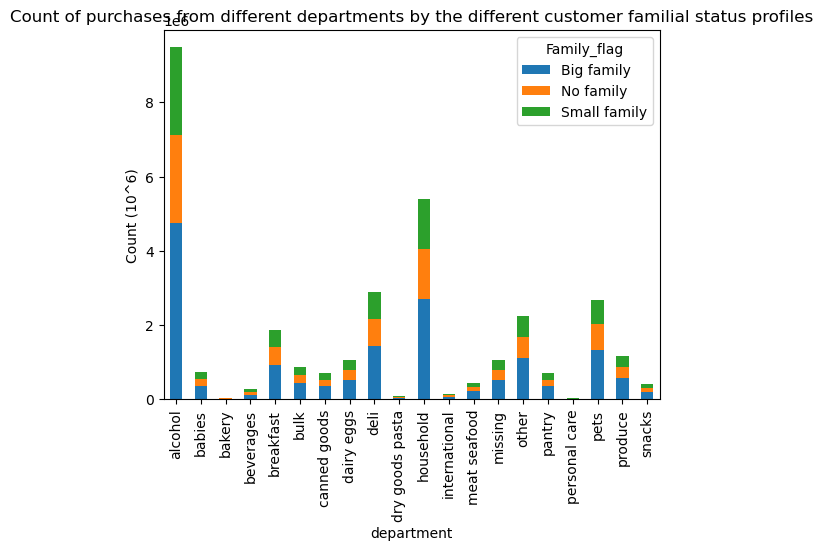

In [59]:
bar_crosstab_family_department = crosstab_family_department.plot(kind= 'bar', stacked = True)
plt.title("Count of purchases from different departments by the different customer familial status profiles")
plt.xlabel("department")
plt.ylabel("Count (10^6)")

In [ ]:
# Big families consume more alcohol and household products than small families and single consumers.

In [60]:
#supplementary data#crosstabing income profile with department
crosstab_loyalty_department=pd.crosstab(df_ord_count['department'] ,df_ord_count['loyalty_flag'])


Text(0, 0.5, 'Count (10^6)')

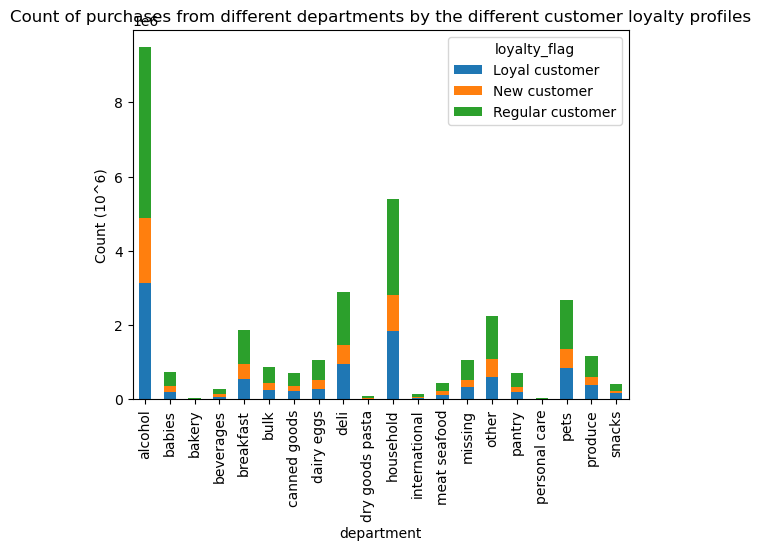

In [62]:
#supplementary data#bar chart
bar_crosstab_loyalty_department = crosstab_loyalty_department.plot(kind= 'bar', stacked = True)
plt.title("Count of purchases from different departments by the different customer loyalty profiles")
plt.xlabel("department")
plt.ylabel("Count (10^6)")

In [26]:
#supplementary data#crosstabing US region with department
crosstab_region_department=pd.crosstab(df_ord_count['department'] , df_ord_count['Region'])


Text(0, 0.5, 'Count (10^6)')

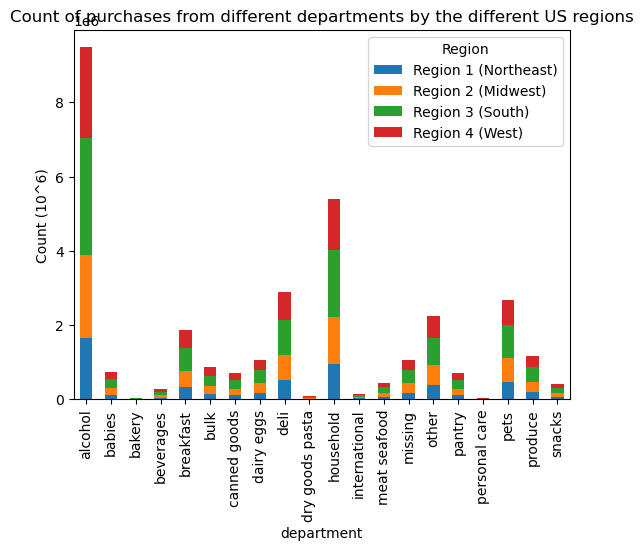

In [63]:
#supplementary data#bar chart
bar_crosstab_region_department = crosstab_region_department.plot(kind= 'bar', stacked = True)
plt.title("Count of purchases from different departments by the different US regions")
plt.xlabel("department")
plt.ylabel("Count (10^6)")

In [64]:
#9#Exporting charts
bar_crosstab_age_region.figure.savefig(r'/Users/nayeraibrahim/Documents/CF assignments/Python/27-10-2020 Instacart Basket Analysis/04 Analysis/Visualisations/410 bar_crosstab_age_region.png')
bar_crosstab_income_region.figure.savefig(r'/Users/nayeraibrahim/Documents/CF assignments/Python/27-10-2020 Instacart Basket Analysis/04 Analysis/Visualisations/410 bar_crosstab_income_region.png')
bar_crosstab_family_region.figure.savefig(r'/Users/nayeraibrahim/Documents/CF assignments/Python/27-10-2020 Instacart Basket Analysis/04 Analysis/Visualisations/410 bar_crosstab_family_region.png')
bar_crosstab_age_department.figure.savefig(r'/Users/nayeraibrahim/Documents/CF assignments/Python/27-10-2020 Instacart Basket Analysis/04 Analysis/Visualisations/410 bar_crosstab_age_department.png')
bar_crosstab_income_department.figure.savefig(r'/Users/nayeraibrahim/Documents/CF assignments/Python/27-10-2020 Instacart Basket Analysis/04 Analysis/Visualisations/410 bar_crosstab_income_department.png')
bar_crosstab_family_department.figure.savefig(r'/Users/nayeraibrahim/Documents/CF assignments/Python/27-10-2020 Instacart Basket Analysis/04 Analysis/Visualisations/410 bar_crosstab_family_department.png')
bar_crosstab_region_department.figure.savefig(r'/Users/nayeraibrahim/Documents/CF assignments/Python/27-10-2020 Instacart Basket Analysis/04 Analysis/Visualisations/410 bar_crosstab_region_department.png')
bar_crosstab_loyalty_department.figure.savefig(r'/Users/nayeraibrahim/Documents/CF assignments/Python/27-10-2020 Instacart Basket Analysis/04 Analysis/Visualisations/410 bar_crosstab_loyalty_department.png')


# Exporting final dataset

In [167]:
df_ord_count.to_pickle(r'/Users/nayeraibrahim/Documents/CF assignments/Python/27-10-2020 Instacart Basket Analysis/02 Data/Prepared Data/df_ord_count.pkl')
